1. 개발환경구축

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

2. 데이터셋 불러오기

In [5]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [8]:
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (60000, 28, 28)
y_train (60000,)
x_test (10000, 28, 28)
y_test (10000,)


3. mnist 데이터셋에서 X의 형태 바꾸기

In [14]:
X_train = x_train.reshape(60000,784,)
X_test = x_test.reshape(10000,784,)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [17]:
print('X_train', x_train.shape)
print('X_test', x_test.shape)

X_train (60000, 28, 28)
X_test (10000, 28, 28)


4. mnist 데이터셋에서 X의 형태 바꾸기

In [19]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [21]:
print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)

Y_train (60000, 10)
Y_test (10000, 10)


5. 인공지능 모델 설계하기

In [23]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
________________________________________________

6. 모델 학습시키기

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2248 - accuracy: 0.9351 -
Epoch 2/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0812 - accuracy: 0.9752
Epoch 3/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0517 - accuracy: 0.9842
Epoch 4/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0375 - accuracy: 0.9882
Epoch 5/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0271 - accuracy: 0.9910
Epoch 6/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0227 - accuracy: 0.9926
Epoch 7/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0168 - accuracy: 0.9949
Epoch 8/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0154 - accuracy: 0.9949
Epoch 9/10
60000/

7. 모델 정확도 살펴보기

In [26]:
score = model.evaluate(X_test, Y_test)                   
print('Test score:', score[0])
print('Test accuracy', score[1])

10000/10000 [==============================] - 1s 139us/sample - loss: 0.0904 - accuracy: 0.9785
Test score: 0.09043156597620418
Test accuracy 0.9785


8. 모델 학습 결과 확인하기

In [28]:
predicted_classes = np.argmax(model.predict(X_test),axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

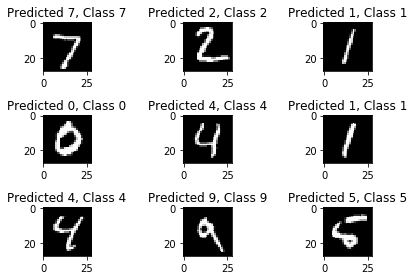

In [33]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    correct = correct_indices[i]
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct],y_test[correct]))
plt.tight_layout()

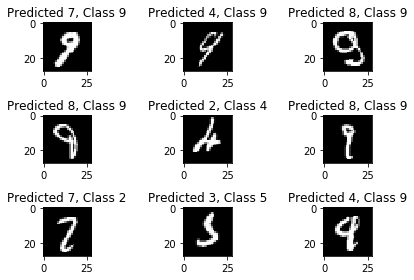

In [38]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    incorrect = incorrect_indices[i]
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect],y_test[incorrect]))
plt.tight_layout()
